# Heart Failure Prediction

## 1. Imported booksellers

Before starting with data analysis, these are the main libraries used:

    .Pandas and numpy : Data vector and matrix operations.
    .matplotlib : Graph generation.
    .sklearn : Models, metrics and data set partitioning.


In [1]:
#Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Metriques 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score

#Hiperparametres
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Extres
import ipywidgets as widgets
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np 
import random
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import cross_val_score


## 2.EDA

The first thing to do is to load the database (heart_failure_clinical_records_dataset.csv), make sure that only 3 decimals can be displayed and look at the dimensionality of the attributes.

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('heart_failure_clinical_records_dataset.csv')
data = dataset.values
x = data[:, :11]
y = data[:,12]

Once the dataset is loaded we will observe the dimensionality and data types.

In [3]:
print("Dimensionality of the BBDD:", dataset.shape)
print("Dimensionality of inputs X", x.shape)
print("Dimensionality of inputs Y", y.shape)
print("")
print(dataset.dtypes)
dataset.head()

Dimensionality of the BBDD: (299, 13)
Dimensionality of inputs X (299, 11)
Dimensionality of inputs Y (299,)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.000,1.900,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.030,1.100,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.000,1.300,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.000,1.900,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8,1


As we can see, our dataset is made up of 299 files and 13 attributes. Each row corresponds to the physical data of a person and includes the following information:

    .Age:Float indicating the person's age.
    .anemia:Integer indicating whether or not the person has anemia.
    .creatinine_phosphokinase:Integer to indicate the amount of creatine phosphokinase.
    .diabetes:Integer to indicate whether or not you have diabetes.
    .Ejection_fraction:Integer to indicate whether or not you have diabetes.
    .high_blood_pressure:Integer to indicate whether or not you have diabetes.
    .platelets:Float to indicate the number of platelets.
    .Serum_creatinine:Float indicating the amount of serum creatine.
    .Serum_sodium:Integer that indicates the amount of serum sodium.
    .sex:Integer to indicate if you are a man or a woman.
    .Smoking:Integer to indicate if you smoke or not.
    .Time:Integer that indicates the time of follow-up.
    .DEATH_EVENT:Integer to indicate if he has died or not during the follow-up period.


Next we are going to make a description of the dataset.

In [4]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,0.431,581.839,0.418,38.084,0.351,263358.029,1.394,136.625,0.649,0.321,130.261,0.321
std,11.895,0.496,970.288,0.494,11.835,0.478,97804.237,1.035,4.412,0.478,0.468,77.614,0.468
min,40.000,0.000,23.000,0.000,14.000,0.000,25100.000,0.500,113.000,0.000,0.000,4.000,0.000
25%,51.000,0.000,116.500,0.000,30.000,0.000,212500.000,0.900,134.000,0.000,0.000,73.000,0.000
50%,60.000,0.000,250.000,0.000,38.000,0.000,262000.000,1.100,137.000,1.000,0.000,115.000,0.000
75%,70.000,1.000,582.000,1.000,45.000,1.000,303500.000,1.400,140.000,1.000,1.000,203.000,1.000
max,95.000,1.000,7861.000,1.000,80.000,1.000,850000.000,9.400,148.000,1.000,1.000,285.000,1.000


Now that we have analyzed the attributes we are going to analyze the target, that is to say, we are going to look at the amount of null values, the number and type of categories it contains and the amount we have of each one.

In [5]:
nulls = dataset['DEATH_EVENT'].isnull().sum()
n_categories = dataset['DEATH_EVENT'].nunique()
print( "The quantity of nulls is: ",nulls )
print( "The quantity of categories is: ",n_categories )

The quantity of nulls is:  0
The quantity of categories is:  2


In this case we have 0 nulls and 2 categories which we have already mentioned above.

<IPython.core.display.Javascript object>


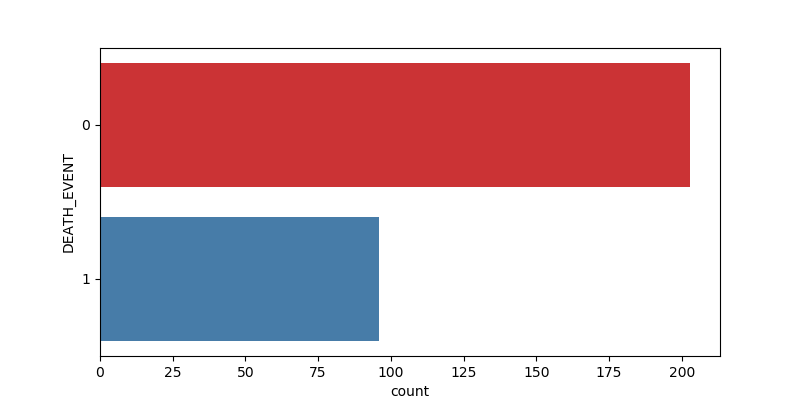

0   67.893
1   32.107
Name: DEATH_EVENT, dtype: float64

In [6]:
dataset['DEATH_EVENT'].value_counts()
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="DEATH_EVENT", data=dataset, palette="Set1")
plt.show()
(dataset['DEATH_EVENT'].value_counts()/len(dataset))*100

As we can see, 67.89% of the people did not die during the follow-up period while the remaining 32.10% did die.
Next we will observe the correlation between the different variables and the target attribute.

<IPython.core.display.Javascript object>


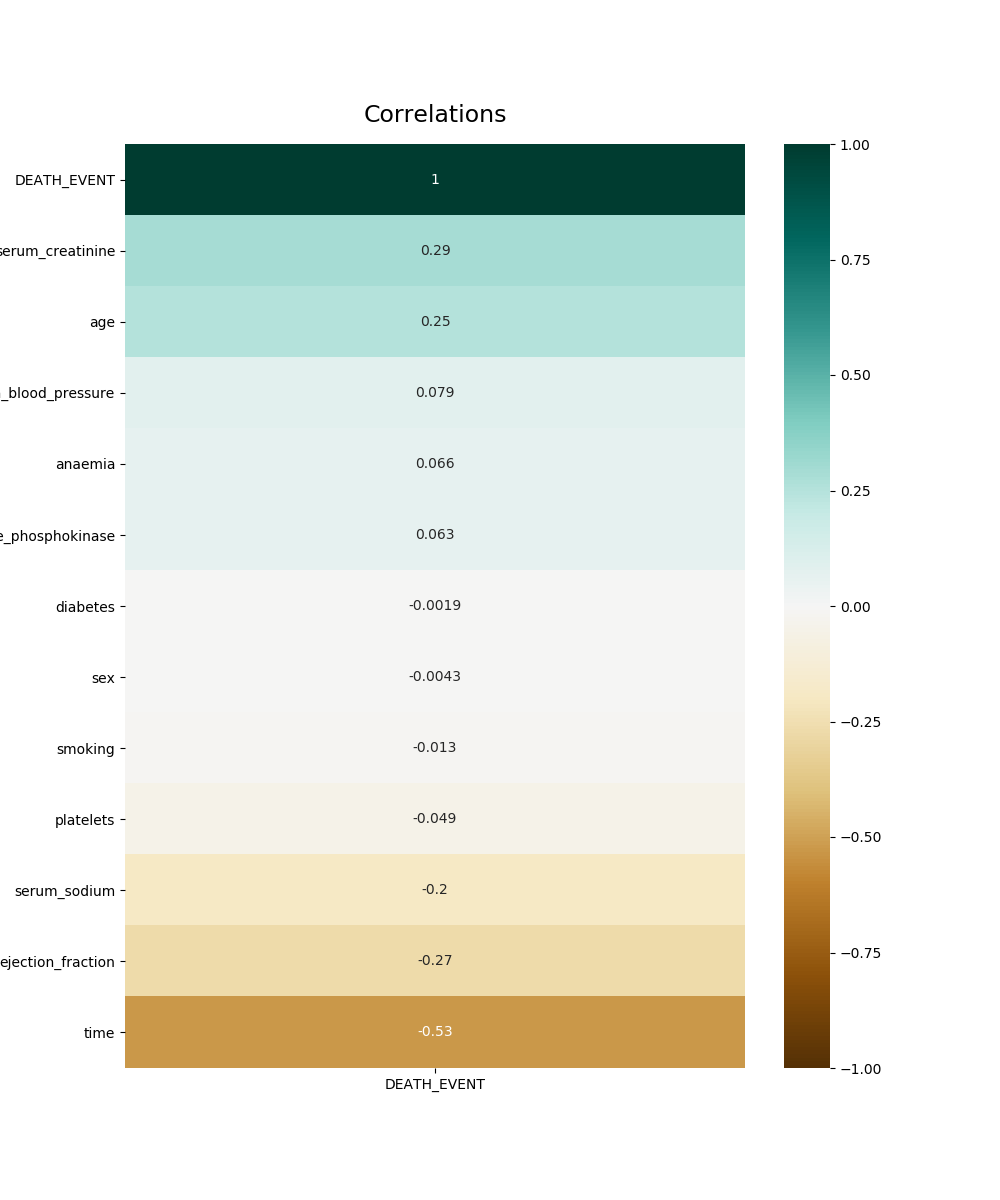

In [7]:
plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(dataset.corr()[["DEATH_EVENT"]].sort_values(by="DEATH_EVENT", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlations', fontdict={'fontsize':17}, pad=16);

As we can see the data that are most positively and negatively correlated are time, ejection_fraction, serum_creatine, serum_sodium and age.
Now that we have analyzed the data we are going to preprocess them.



## 3. Preprocessing (normalitzation, outlier removal, feature selection..)

The first thing we do to preprocess the data is to observe how much null data there is in the dataset and if found, process them.

In [8]:
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

As we can see in this case there are no nulls in the dataset.
Next we are going to normalize the data, since the attributes have values with very different ranges. In this case we will use the mean normalization, since it is the most appropriate for cases with different numerical ranks. Thanks to this process, what we achieve is to eliminate the soroll and the numerical difference of the data.

In [9]:
continues=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
def standarize(x):
    mean = x.mean(0)
    std = x.std(0)
    x_t = x - mean[None, :]
    x_t /= std[None, :]
    return x_t

data=dataset[continues].values
x_continues=data[:, :]
x_t = standarize(x_continues)
for i,z in enumerate(continues):
    dataset[z]=x_t[:,i]
x_t = data[:, :11]
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,0.000,0,-1.531,1,0.017,0.490,-1.504,1,0,4,1
1,55.000,0,7.515,0,-0.007,0,0.000,-0.285,-0.142,1,0,6,1
2,65.000,0,-0.450,0,-1.531,0,-1.038,-0.091,-1.731,1,1,7,1
3,50.000,1,-0.486,0,-1.531,0,-0.546,0.490,0.085,1,0,7,1
4,65.000,1,-0.435,1,-1.531,0,0.652,1.265,-4.682,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.000,0,-0.538,1,-0.007,1,-1.110,-0.285,1.447,1,1,270,0
295,55.000,0,1.278,0,-0.007,0,0.068,-0.188,0.539,0,0,271,0
296,45.000,0,1.526,1,1.855,0,4.902,-0.575,0.312,0,0,278,0
297,45.000,0,1.890,0,-0.007,0,-1.263,0.006,0.766,1,1,280,0


Once the data processing is finished, we will carry out the selection of classification models.

### 4. Model Selection

The first thing we have to do is to see which models we can consider in order to carry out the classification and in this case we have taken into account five models which are:

    .logistic regression
    .SVM
    .K-Neighbors
    .Decision Tree
    .Random Forest

We have taken these five into account because in this case we are dealing with a supervised learning problem.
Once we have chosen the models to take into account we have to select one and that is why we are going to compare them according to how good they can be according to our database.
That is why we are going to test them and see the time/precision ratio they provide us with. As a scoring metric we will use average_precision_score, since the data is unbalanced in favor of the negative cases (death_event 0).


Before making the comparison of models, what we have to do is to see what are the most significant attributes.

In [10]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x_iloc = dataset.iloc[:, :-1]
y_iloc = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model2 = ExtraTreesClassifier()
model2.fit(x_iloc,y_iloc)
for i in range(len(x_iloc.columns)):
    print(x_iloc.columns[i],model2.feature_importances_[i]) 


age 0.09739004029049395
anaemia 0.027797768048019422
creatinine_phosphokinase 0.06948311754004281
diabetes 0.03002661057336278
ejection_fraction 0.14154426584423035
high_blood_pressure 0.022422596197943963
platelets 0.0742465733156834
serum_creatinine 0.12015860290734454
serum_sodium 0.08118713582682008
sex 0.02807532753482368
smoking 0.02802974840453221
time 0.27963821351670276


As we can observe the best attributes are time, ejection_fraction, serum_creatine, serum_sodium and age as it could be observed previously when analyzing the correlation.
These attributes are the ones we will use to perform the model study.
In case of case we will see how the precision varies using these attributes or all of them.

In [11]:
features=['time', 'ejection_fraction','serum_creatinine','serum_sodium','age']
x_t2=dataset[features]

#### Comparison of models with different quantity of attributes:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_t, y, test_size = 0.2, random_state = 0)
precision_list = []
# logistic regression
particions = [0.5,0.75,0.9]
pre=0
t0=time.time()
for part in particions:
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    log_reg_pred = log_reg.predict(x_test)
    pre+= average_precision_score(y_test, log_reg_pred)
    
final=time.time()-t0
pre=pre/3
print("Precission using all attributes:",pre)

Precission using all attributes: 0.38333333333333336


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_t2, y, test_size = 0.2, random_state = 0)
precision_list = []
# logistic regression
particions = [0.5,0.75,0.9]
pre=0
t0=time.time()
for part in particions:
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    log_reg_pred = log_reg.predict(x_test)
    pre+= average_precision_score(y_test, log_reg_pred)
    
final=time.time()-t0
pre=pre/3
print("Precission using the 5 best atributes:",pre)
x_t=dataset[features]

Precission using the 5 best atributes: 0.7050724637681159


As we can see it is much better using only the 5 chosen attributes since we go from an accuracy of 38.33% to 70.50%.
Now let's compare the different models.

#### Logistic regression

In [14]:

precision_list = []
# logistic regression
particions = [0.5,0.75,0.9]
pre=0
t0=time.time()
for part in particions:
    x_train, x_test, y_train, y_test = train_test_split(x_t2, y, train_size = part, random_state = 0)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    log_reg_pred = log_reg.predict(x_test)
    pre+= average_precision_score(y_test, log_reg_pred)
    
final=time.time()-t0
pre=pre/3
print("Precission obtained with the Logistic Regression model: ", "{:.2f}%".format(100* pre))

Precission obtained with the Logistic Regression model:  61.83%


#### K-Neighbors

In [15]:
pre2=0
t0=time.time()
for part in particions:
    x_train, x_test, y_train, y_test = train_test_split(x_t2, y, train_size = part, random_state = 0)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train, y_train)
    y_pred_test = KNN.predict(x_test)
    pre2+=average_precision_score(y_test, y_pred_test)

final2=time.time()-t0
pre2=pre2/3
print("Precission obtained with K-Neighbors", "{:.2f}%".format(100* pre2))

Precission obtained with K-Neighbors 61.21%


#### SVM

In [16]:
pre3=0
t0=time.time()
for part in particions:
    x_train, x_test, y_train, y_test = train_test_split(x_t, y, train_size = part, random_state = 0)
    sv_clf = SVC()
    sv_clf.fit(x_train, y_train)
    sv_clf_pred = sv_clf.predict(x_test)
    pre3+= average_precision_score(y_test, sv_clf_pred)

final3=time.time()-t0
pre3=pre3/3
print("Precission obtained with SVM", "{:.2f}%".format(100* pre3))

Precission obtained with SVM 62.54%


#### Decision Tree

In [17]:
pre4=0
t0=time.time()
for part in particions:
    x_train, x_test, y_train, y_test = train_test_split(x_t, y, train_size = part, random_state = 0)
    dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
    dt_clf.fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)
    pre4+=average_precision_score(y_test, dt_pred)
final4=time.time()-t0
pre4=pre4/3
print("Precission obtained with Decision Tree", "{:.2f}%".format(100* pre4))    

Precission obtained with Decision Tree 65.28%


#### Random Forest

In [18]:

pre5=0
t0=time.time()
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}
for part in particions:
    x_train, x_test, y_train, y_test = train_test_split(x_t, y, train_size = part, random_state = 0)
    Bosc = RandomForestClassifier(**params_rf)
    Bosc.fit(x_train, y_train)
    y_pred_test = Bosc.predict(x_test)
    pre5+=average_precision_score(y_test, y_pred_test)

final5=time.time()-t0
pre5=pre5/3
print("Precission obtained with Random Forest: ", "{:.2f}%".format(100* pre5))

Precission obtained with Random Forest:  66.35%


<IPython.core.display.Javascript object>


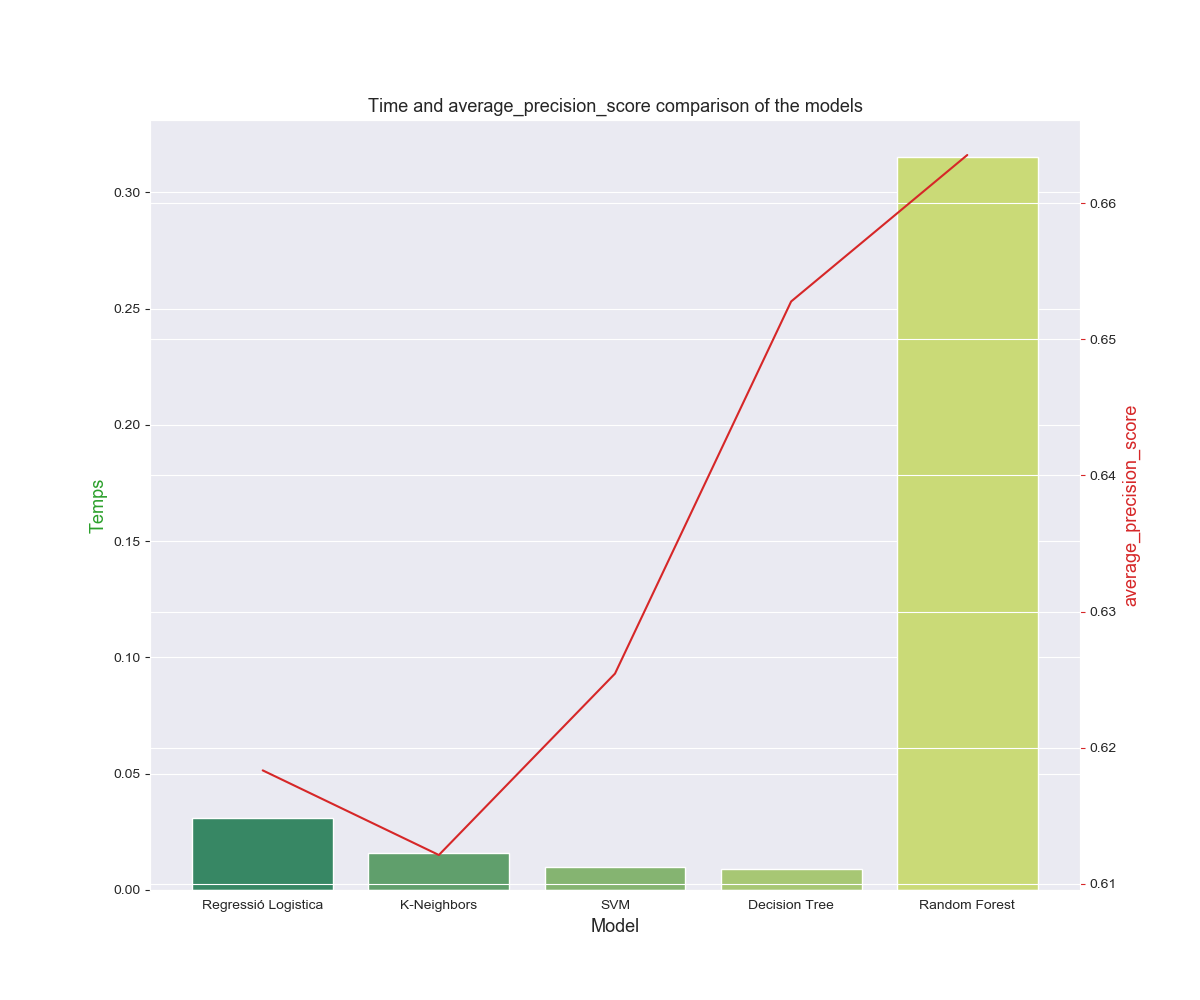

In [23]:
av = [pre, pre2, pre3, pre4,pre5]
temps=[final,final2,final3,final4,final5]

model_data = {'Model': ['Regressió Logistica','K-Neighbors','SVM','Decision Tree','Random Forest'],'average_precision_score': av,'Temps': temps}
              
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Time and average_precision_score comparison of the models', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Temps', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('average_precision_score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='average_precision_score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


As it is possible to observe in using ensembles as in the case of the random forests we obtain a good accuracy in a reasonable time since when combining different models the errors tend to compensate each other.
On the other hand, it should also be noted that by using them we considerably reduce the risk of overfitting and that even if we provide new samples it continues to be efficient, that is why from the previous results we chose the Random Forest model.

### 5. Hyperparameter Search

Before carrying out the search, it should be pointed out that a hyperparameter is a parameter in which its value is used to control the learning process, since otherwise it is learned from the values of other parameters. When it comes to finding the best parameter the two most used forms are the GridSearchCV and the RandomizedSearchCV, which in the first case is an exhaustive search through a manually specified subset of the hyperparameter space of a learning algorithm while the second replaces the exhaustive enumeration of all the selected combinations at random. In terms of computational cost, it should be noted that these two forms are computationally expensive, since they have to perform exhaustive tasks that take a long time. As for other more efficient search methods, we have the Scikit-Optimize library which contains a hyperparameter optimization method called BayesSearchCV. This method is a direct replacement of GridSearchCV. It uses Bayesian Optimization where a predictive model called "surrogate" is used to model the search space thus arriving at a good combination of parameter values as early as possible.

#### GridSearchCV:

In [24]:
Bosc=RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
     'max_depth': [10, 20, 30, 40],
     'max_features': ['auto'],
     'min_samples_leaf': [1, 2, 5,10],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000]

}
grid_search = GridSearchCV(estimator = Bosc, param_grid = param_grid, cv = 5)
t0=time.time()
grid_search.fit(x,y)
t1=time.time()-t0
sc1=(grid_search.best_score_)
par1=(grid_search.best_params_)
res1=(grid_search.cv_results_)

#### BayesSearchCV:

In [25]:
Bosc=RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
     'max_depth': [10, 20, 30, 40],
     'max_features': ['auto'],
     'min_samples_leaf': [1, 2, 5,10],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000]


}
BayesSearchCV = BayesSearchCV( cv=5,estimator=Bosc, search_spaces = param_grid)
t0=time.time()
BayesSearchCV.fit(x,y)
t2=time.time()-t0
sc2=(BayesSearchCV.best_score_)
par2=(BayesSearchCV.best_params_)
res2=(BayesSearchCV.cv_results_)


#### RandomizedSearchCV:

In [26]:
Bosc=RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
     'max_depth': [10, 20, 30, 40],
     'max_features': ['auto'],
     'min_samples_leaf': [1, 2, 5,10],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [200, 400, 600, 800, 1000]

}
random = RandomizedSearchCV(cv=5,estimator=Bosc,  param_distributions = param_grid )
t0=time.time()
random.fit(x, y)
t3=time.time()-t0
sc3=(random.best_score_)
par3=(random.best_params_)
res3=random.cv_results_

<IPython.core.display.Javascript object>


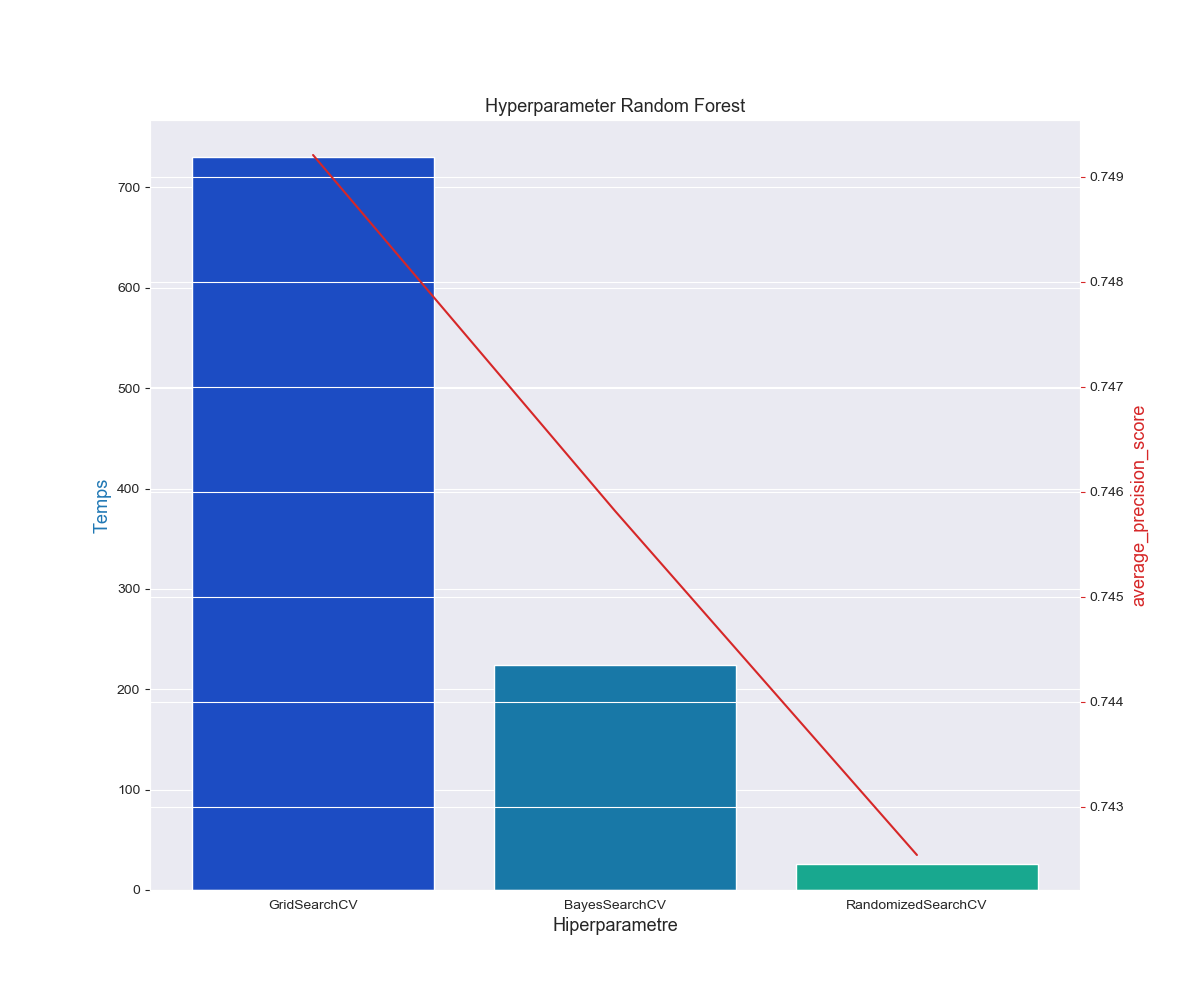

In [27]:
average_precision_score = [sc1 , sc2, sc3]
temps=[t1,t2,t3]

model_data = {'Hiperparametre': ['GridSearchCV','BayesSearchCV','RandomizedSearchCV'],'average_precision_score': average_precision_score,'Temps': temps}
              
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Hyperparameter Random Forest', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Hiperparametre', fontsize=13)
ax1.set_ylabel('Temps', fontsize=13, color=color)
ax2 = sns.barplot(x='Hiperparametre', y='Temps', data = data, palette='winter')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('average_precision_score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Hiperparametre', y='average_precision_score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

As we can observe the GridSearchCV gives us the best accuracy, but it also has the highest time cost. As for the BayesSearchCV we can observe that it provides us with the best accuracy, but its time cost is low. Finally we can observe that the RandomizedSearchCV gives us a good accuracy with a very low time cost and therefore we will use its parameters.

In [28]:
print("In conclusion the best parameters found are: ")
par3

In conclusion the best parameters found are: 


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

## 6. Conclusions

After solving this problem using Deep Learning we have reached the following conclusions:

    .The best attributes to perform the prediction are time, ejection_fraction,serum_creatine,serum_sodium and age.
    .The best model for this problem in terms of computational cost compared to the results obtained is the random forest.
    .The best parameters that can be used for the model are those obtained with the RandomizedSearchCV.

### Webgraphy


.Kaggle: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

.Datauab: https://datauab.github.io

.Models i hiperparametres: https://scikit-learn.org/stable/

.Leave-one-out: https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/
    
.Curves ROC i PR: https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527
    
.Warnings: https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
